In [ ]:
!pip install fast_ml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42 kB 723 kB/s 


In [ ]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from keras import layers
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from keras.layers import TextVectorization
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [ ]:
nltk.download("popular",quiet= True)
from nltk.corpus import names

In [ ]:
males = names.words('male.txt')
females = names.words('female.txt')

In [ ]:
males_df = pd.DataFrame({"NAME":males,"GENDER":"MALE"})
print(males_df.shape)

females_df = pd.DataFrame({"NAME":females,"GENDER":"FEMALE"})
print(females_df.shape)

(2943, 2)
(5001, 2)


In [ ]:
males_df.head()

,NAME,GENDER
0,Aamir,MALE
1,Aaron,MALE
2,Abbey,MALE
3,Abbie,MALE
4,Abbot,MALE


In [ ]:
females_df.head()

,NAME,GENDER
0,Abagael,FEMALE
1,Abagail,FEMALE
2,Abbe,FEMALE
3,Abbey,FEMALE
4,Abbi,FEMALE


In [ ]:
data = pd.concat([females_df,males_df],ignore_index= True)
# Shuffling all the rows 
data = data.sample(frac=1,random_state = 2,ignore_index= True)
data.shape

(7944, 2)

In [ ]:
data.head()

,NAME,GENDER
0,Tracy,MALE
1,Emile,MALE
2,Janaya,FEMALE
3,Iona,FEMALE
4,Zerk,MALE


## Data Visualization 

### Distribution of different letters

In [ ]:
import string
letters = list(string.ascii_uppercase)
letter_dist = []
for l in letters:
  l_data = len([idx for idx in data["NAME"] if idx[0] == l])
  letter_dist.append(l_data)

letter_dist_df = pd.DataFrame({"LETTERS":letters,"DIST":letter_dist})
letter_dist_df.head()

,LETTERS,DIST
0,A,656
1,B,419
2,C,635
3,D,454
4,E,370


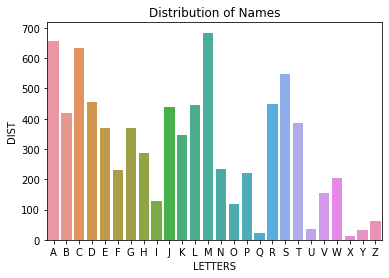

In [ ]:
sns.barplot(data = letter_dist_df, x = "LETTERS", y = "DIST")
plt.title("Distribution of Names")
plt.show()

### Distribution of Males and Females

In [ ]:
gender_dist_df = pd.DataFrame({"COUNT":[len(data[data['GENDER'] == 'MALE']),len(data[data['GENDER'] == 'FEMALE'].value_counts())],"GENDER":["MALE",'FEMALE']})
gender_dist_df.head()

,COUNT,GENDER
0,2943,MALE
1,5001,FEMALE


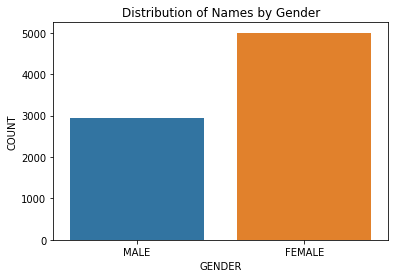

In [ ]:
sns.barplot(data = gender_dist_df, x = "GENDER", y = "COUNT")
plt.title("Distribution of Names by Gender")
plt.show()

## Data Preprocessing

In [ ]:
def data_preprocess(data):
  data['NAME'] = data['NAME'].str.lower().str.strip()
  data = pd.get_dummies(data,columns = ["GENDER"])
  outputs = data[['GENDER_MALE','GENDER_FEMALE']].values.astype(int)
  data['GENDER'] = list(outputs)
  del data['GENDER_MALE'], data['GENDER_FEMALE']
  return data


In [ ]:
data = data_preprocess(data)
data.head()

,NAME,GENDER
0,tracy,"[1, 0]"
1,emile,"[1, 0]"
2,janaya,"[0, 1]"
3,iona,"[0, 1]"
4,zerk,"[1, 0]"


In [ ]:
X = data['NAME']
y = data['GENDER']

In [ ]:
def data_vectorization(data):
  # TFIDF
  tf_idf_vect = TfidfVectorizer(ngram_range=(1,2), use_idf=True, 
                                                       analyzer='char',max_features =26,
                                                       smooth_idf = True,)
  data = tf_idf_vect.fit_transform(data)
  return data

In [ ]:
X = data_vectorization(X)

In [ ]:
X.shape

(7944, 26)

In [ ]:
X = X.toarray().astype('float32')
y = np.array([np.array(val) for val in y])

In [ ]:
# # Split the data into train test 
np.random.seed(0)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((5322, 26), (5322, 2), (2622, 26), (2622, 2))

In [ ]:
x_train

array([[0.2847958 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.36135566, 0.        , 0.        , ..., 0.2943619 , 0.        ,
        0.        ],
       [0.68328696, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.32705075, 0.        ,
        0.        ],
       [0.45146254, 0.        , 0.4750885 , ..., 0.        , 0.        ,
        0.        ],
       [0.21930136, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [ ]:
y_train

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [0, 1],
       [1, 0]])

## Task-1 

Create a convolutional neural network model with two 1D convolutional layers. Use sigmoid activation and apply a dropout of your desired units after creating the convolution layers. In the end, create a softmax layer. Predict whether the names in test data are male or female. Evaluate your predictions (you can use the scikit learn classification report).

In [ ]:
model = keras.Sequential()

model.add(layers.Input(shape = [26,1]))
model.add(layers.Conv1D(26,kernel_size=1,activation="sigmoid"))
model.add(layers.Conv1D(26,kernel_size=1, activation="sigmoid"))
model.add(layers.Dropout(0.1))
model.add(layers.Flatten())
model.add(layers.Dense(units = 2, activation="softmax"))
model.summary()
model.compile(optimizer="Adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

Model: "sequential_87"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_106 (Conv1D)         (None, 26, 26)            52        
                                                                 
 conv1d_107 (Conv1D)         (None, 26, 26)            702       
                                                                 
 dropout_60 (Dropout)        (None, 26, 26)            0         
                                                                 
 flatten_43 (Flatten)        (None, 676)               0         
                                                                 
 dense_52 (Dense)            (None, 2)                 1354      
                                                                 
Total params: 2,108
Trainable params: 2,108
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train,
                    y_train,
                    epochs=45,
                    validation_data=(x_test, y_test))

Epoch 1/45
167/167 [==============================] - 2s 6ms/step - loss: 0.6863 - accuracy: 0.6022 - val_loss: 0.6792 - val_accuracy: 0.6293
Epoch 2/45
167/167 [==============================] - 1s 5ms/step - loss: 0.6718 - accuracy: 0.6094 - val_loss: 0.6599 - val_accuracy: 0.6293
Epoch 3/45
167/167 [==============================] - 1s 5ms/step - loss: 0.6758 - accuracy: 0.6109 - val_loss: 0.6592 - val_accuracy: 0.6293
Epoch 4/45
167/167 [==============================] - 1s 5ms/step - loss: 0.6726 - accuracy: 0.6195 - val_loss: 0.6598 - val_accuracy: 0.6293
Epoch 5/45
167/167 [==============================] - 1s 5ms/step - loss: 0.6682 - accuracy: 0.6219 - val_loss: 0.6621 - val_accuracy: 0.6293
Epoch 6/45
167/167 [==============================] - 1s 5ms/step - loss: 0.6639 - accuracy: 0.6263 - val_loss: 0.6595 - val_accuracy: 0.6293
Epoch 7/45
167/167 [==============================] - 1s 5ms/step - loss: 0.6621 - accuracy: 0.6278 - val_loss: 0.6595 - val_accuracy: 0.6293
Epoch 

In [ ]:
y_pred = model.predict(x_test)

82/82 [==============================] - 0s 2ms/step


In [ ]:
score, acc = model.evaluate(x_test, y_test)
score, acc

82/82 [==============================] - 0s 2ms/step - loss: 0.5797 - accuracy: 0.7033


(0.5797165036201477, 0.7032799124717712)

In [ ]:
y_pred[0]

array([0.47874552, 0.5212544 ], dtype=float32)

In [ ]:
print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), target_names=['Female', 'Male']))

              precision    recall  f1-score   support

      Female       0.61      0.54      0.57       972
        Male       0.75      0.80      0.77      1650

    accuracy                           0.70      2622
   macro avg       0.68      0.67      0.67      2622
weighted avg       0.70      0.70      0.70      2622



## Task-2
Create a simple sequential model with an LSTM layer of your desired units. Use sigmoid activation. Predict whether the names in test data are male or female. Evaluate your predictions (you can use the scikit learn classification report).

In [ ]:
model2 = keras.Sequential()

model2.add(layers.Input(shape = [26,1]))
model2.add(layers.LSTM(26, return_sequences = True, activation='sigmoid'))
model2.add(layers.Flatten())
model2.add(layers.Dense(units = 2, activation="softmax"))
model2.summary()
model2.compile(optimizer="Adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 26, 26)            2912      
                                                                 
 flatten_26 (Flatten)        (None, 676)               0         
                                                                 
 dense_35 (Dense)            (None, 2)                 1354      
                                                                 
Total params: 4,266
Trainable params: 4,266
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model2.fit(x_train,
                    y_train,
                    epochs=45,
                    validation_data=(x_test, y_test))

Epoch 1/45
167/167 [==============================] - 4s 17ms/step - loss: 0.6676 - accuracy: 0.6297 - val_loss: 0.6698 - val_accuracy: 0.6293
Epoch 2/45
167/167 [==============================] - 2s 15ms/step - loss: 0.6693 - accuracy: 0.6257 - val_loss: 0.6601 - val_accuracy: 0.6293
Epoch 3/45
167/167 [==============================] - 3s 16ms/step - loss: 0.6635 - accuracy: 0.6300 - val_loss: 0.6802 - val_accuracy: 0.6293
Epoch 4/45
167/167 [==============================] - 3s 16ms/step - loss: 0.6628 - accuracy: 0.6233 - val_loss: 0.6541 - val_accuracy: 0.6293
Epoch 5/45
167/167 [==============================] - 3s 16ms/step - loss: 0.6582 - accuracy: 0.6297 - val_loss: 0.6530 - val_accuracy: 0.6293
Epoch 6/45
167/167 [==============================] - 3s 15ms/step - loss: 0.6547 - accuracy: 0.6276 - val_loss: 0.6607 - val_accuracy: 0.6293
Epoch 7/45
167/167 [==============================] - 3s 15ms/step - loss: 0.6502 - accuracy: 0.6285 - val_loss: 0.6520 - val_accuracy: 0.6465

In [ ]:
lstm_pred = model2.predict(x_test)

82/82 [==============================] - 1s 5ms/step


In [ ]:
y_test

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]])

In [ ]:
score, acc = model2.evaluate(x_test, y_test)
score, acc

82/82 [==============================] - 0s 5ms/step - loss: 0.5788 - accuracy: 0.7147


(0.578752338886261, 0.7147215604782104)

In [ ]:
y_pred[0]

array([0.38531438, 0.61468554], dtype=float32)

In [ ]:
print(classification_report(np.argmax(y_test, axis=1), np.argmax(lstm_pred, axis=1),target_names=['Female', 'Male']))

              precision    recall  f1-score   support

      Female       0.70      0.40      0.51       972
        Male       0.72      0.90      0.80      1650

    accuracy                           0.71      2622
   macro avg       0.71      0.65      0.65      2622
weighted avg       0.71      0.71      0.69      2622



## Task-3
Mixing LSTM and CNN for prediction. Combine LSTM and CNN layers (e.g., LSTM layer followed by CNN layer, etc.) to make predictions. Try different activation functions and dropout rates and report your results.

In [ ]:
model3 = keras.Sequential()

model3.add(layers.Input(shape = [26,1]))
model3.add(layers.LSTM(26,return_sequences= True,activation='relu'))
model3.add(layers.Reshape((676,1)))
model3.add(layers.Conv1D(26,kernel_size=1, activation="relu"))
model3.add(layers.Dropout(0.1))
model3.add(layers.Flatten())
model3.add(layers.Dense(units = 2, activation="softmax"))
model3.summary()
model3.compile(optimizer="Adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

Model: "sequential_84"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_28 (LSTM)              (None, 26, 26)            2912      
                                                                 
 reshape_15 (Reshape)        (None, 676, 1)            0         
                                                                 
 conv1d_103 (Conv1D)         (None, 676, 26)           52        
                                                                 
 dropout_58 (Dropout)        (None, 676, 26)           0         
                                                                 
 flatten_41 (Flatten)        (None, 17576)             0         
                                                                 
 dense_50 (Dense)            (None, 2)                 35154     
                                                                 
Total params: 38,118
Trainable params: 38,118
Non-tra

In [ ]:
history = model3.fit(x_train,
                    y_train,
                    epochs=40,
                    validation_data=(x_test, y_test))

Epoch 1/40
167/167 [==============================] - 5s 32ms/step - loss: 0.5464 - accuracy: 0.7266 - val_loss: 0.5678 - val_accuracy: 0.7159
Epoch 2/40
167/167 [==============================] - 5s 32ms/step - loss: 0.5455 - accuracy: 0.7221 - val_loss: 0.5721 - val_accuracy: 0.7170
Epoch 3/40
167/167 [==============================] - 5s 33ms/step - loss: 0.5458 - accuracy: 0.7262 - val_loss: 0.5656 - val_accuracy: 0.7197
Epoch 4/40
167/167 [==============================] - 5s 32ms/step - loss: 0.5417 - accuracy: 0.7270 - val_loss: 0.5688 - val_accuracy: 0.7082
Epoch 5/40
167/167 [==============================] - 6s 38ms/step - loss: 0.5419 - accuracy: 0.7274 - val_loss: 0.5689 - val_accuracy: 0.7090
Epoch 6/40
167/167 [==============================] - 5s 32ms/step - loss: 0.5414 - accuracy: 0.7260 - val_loss: 0.5667 - val_accuracy: 0.7090
Epoch 7/40
167/167 [==============================] - 5s 32ms/step - loss: 0.5423 - accuracy: 0.7262 - val_loss: 0.5716 - val_accuracy: 0.7052

In [ ]:
lstm_cnn_pred = model3.predict(x_test)

82/82 [==============================] - 1s 8ms/step


In [ ]:
x_test.shape

(2622, 26)

In [ ]:
x_test[0]

array([0.18185312, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.37458158, 0.        , 0.41271752, 0.        ,
       0.34091166, 0.21207339, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.22250277, 0.        , 0.30734256, 0.5925534 , 0.        ,
       0.        ], dtype=float32)

In [ ]:
model3.predict(x_test)

82/82 [==============================] - 1s 7ms/step


array([[0.17002384, 0.82997614],
       [0.66259885, 0.3374011 ],
       [0.5810015 , 0.4189985 ],
       ...,
       [0.12131784, 0.87868214],
       [0.18892223, 0.81107783],
       [0.4244989 , 0.57550114]], dtype=float32)

In [ ]:
score, acc = model3.evaluate(x_test, y_test)
score, acc

82/82 [==============================] - 1s 7ms/step - loss: 0.5704 - accuracy: 0.7079


(0.5703970193862915, 0.7078565955162048)

In [ ]:
print(classification_report(np.argmax(y_test, axis=1), np.argmax(lstm_cnn_pred, axis=1),target_names=['Female', 'Male']))

              precision    recall  f1-score   support

      Female       0.61      0.59      0.60       972
        Male       0.76      0.78      0.77      1650

    accuracy                           0.71      2622
   macro avg       0.69      0.68      0.69      2622
weighted avg       0.71      0.71      0.71      2622

